In [0]:
import numpy as np

In [0]:
def sig(z):
    return 1 / (1 + np.exp(-z))

def dsig_dz(z):
    return sig(z) * (1 - sig(z))

def relu(z):
    return np.where(z>0, z, 0)
    
def drelu_dz(z):
    return np.where(z>0, 1, 0)

def J(y, yhat):
    eps = 1e-8
    return -(yhat*np.log(y+eps) + (1-yhat)*np.log(1-y+eps))

def dJ_dy(y, yhat):
    eps = 1e-8
    return (1-yhat)/(1-y+eps) - yhat/(y+eps)

we will create a data array in which we will try to identify at least some dependence, correcting the past error of randomized independent random data

In [0]:
n_samples = 1000
X0 = np.random.normal(loc=[0,0], scale=[2,0.5], size=(int(n_samples/2), 2))
X11 = np.random.normal(loc=[0,3.5], scale=[0.5,1], size=(int(n_samples/4), 2))
X12 = np.random.normal(loc=[0,-3.5], scale=[0.5,1], size=(int(n_samples/4), 2))
X1 = np.vstack([X11, X12])
X = np.vstack([X0, X1]) # input array

In [0]:
y0 = np.zeros(shape=(int(n_samples/2), 1))
y1 = np.ones(shape=(int(n_samples/2), 1))
yhat = np.vstack([y0, y1]) # output array, "y with hat"

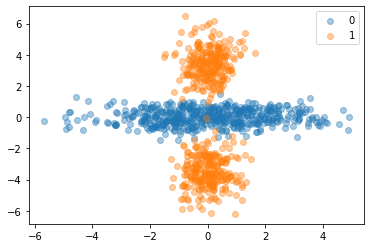

In [91]:
import matplotlib.pyplot as plt
X0 = X[(yhat==0).reshape(-1)]
X1 = X[(yhat==1).reshape(-1)]

plt.scatter(*X0.T, label='0', alpha=0.4); plt.scatter(*X1.T, label='1', alpha=0.4)
plt.legend();

set the network structure, weights and biases

In [0]:
n_input = 2
n_hidden = 3
n_output = 1

In [0]:
w1 = np.random.normal(0,0.1, size=(n_input, n_hidden))
w2 = np.random.normal(0,0.1, size=(n_hidden, n_output))

b1 = np.random.normal(0,0.1, size=(n_hidden, 1))
b2 = np.random.normal(0,0.1, size=(n_output, 1))

In [0]:
def forward_prop(x0, w1, b1, w2, b2): # we realize forward propogation, that returns the output of a neural network
    x1 = relu(np.dot(x0, w1) + b1.T)  # output of hidden layer
    return sig(np.dot(x1, w2) + b2.T)  # output of output layer

In [0]:
def backward_prop(x0, w1, b1, w2, b2, y, yhat, alpha): # realize backward propogation
    # quantities
    z1 = np.dot(x0, w1) + b1.T
    x1 = relu(z1)
    z2 = np.dot(x1, w2) + b2.T
    y = sig(z2)

    # we consider the coefficients necessary for changing weights, based on the method of back propagation of error
    delta2 = dJ_dy(y, yhat) * dsig_dz(z2) # dJ_dy is derivative of the error (loss) function to the true output of the neurone, dsig_dz is derivative of the activation function (sigmoid) to the input of the neurone
    delta1 = np.matmul(w2, delta2) * drelu_dz(z1).T # a similar operation for the previous layer with its activation function (relu)

    # change weights depending on the data received
    w2 -= alpha * np.multiply(delta2, x1).T # alpha is a learning rate
    w1 -= alpha * np.multiply(delta1, x0).T

    # change biases depending on the data received
    b2 -= alpha * delta2
    b1 -= alpha * delta1
    
    return w1, b1, w2, b2 # at the output of this function, we obtain the values ​​of weights and bias vectors that will be used for subsequent training of the network and will be fed to the input for the next epoch

let's put all of the above into a single algorithm

In [0]:
def train(X, yhat, n_hidden, alpha, n_epoch):
    n_samples = X.shape[0]
    n_input = X.shape[1]
    n_output = 1
    
    # keep track of performance during training
    costs = np.zeros(shape=(n_epoch,1))

    # random nonzero initialization
    w1 = np.random.normal(0, 1, size=(n_input, n_hidden))
    w2 = np.random.normal(0, 1, size=(n_hidden, n_output))
    
    b1 = np.random.normal(0, 1, size=(n_hidden, 1))
    b2 = np.random.normal(0, 1, size=(n_output, 1))

# learning with the ability to display metric values ​​every n-th number of epochs
    for epoch in range(n_epoch):
        for i in range(n_samples):
            x0 = X[i,:]; yh = yhat[i]
            y = forward_prop(x0, w1, b1, w2, b2)  # prediction for one sample
            w1, b1, w2, b2 = backward_prop(x0, w1, b1, w2, b2, y, yh, alpha)  # take step
        
        # Calculate total cost after epoch
        predictions = forward_prop(X, w1, b1, w2, b2)  # predictions for entire set
        costs[epoch] = np.mean(J(predictions, yhat))  # mean cost per sample
        # report progress
        if ((epoch % 10) == 0) or (epoch == (n_epoch - 1)):
            #print(predictions.round())
            accuracy = np.mean(predictions.round() == yhat)  # current accuracy on entire set
            print('Training accuracy after epoch {}: {:.4%}'.format(epoch, accuracy))
            
    return w1, b1, w2, b2, costs

In [97]:
n_epoch = 100
n_hidden = 3
alpha = 0.001
w1, b1, w2, b2, costs = train(X, yhat, n_hidden, alpha, n_epoch)

Training accuracy after epoch 0: 50.0000%
Training accuracy after epoch 10: 98.2000%
Training accuracy after epoch 20: 98.5000%
Training accuracy after epoch 30: 98.6000%
Training accuracy after epoch 40: 98.8000%
Training accuracy after epoch 50: 99.0000%
Training accuracy after epoch 60: 99.0000%
Training accuracy after epoch 70: 99.1000%
Training accuracy after epoch 80: 99.1000%
Training accuracy after epoch 90: 99.2000%
Training accuracy after epoch 99: 99.2000%


let's test the network on other data

In [0]:
n_samples = 1000
X0 = np.random.normal(loc=[0,0], scale=[2,0.5], size=(int(n_samples/2), 2))
X11 = np.random.normal(loc=[0,3.5], scale=[0.5,1], size=(int(n_samples/4), 2))
X12 = np.random.normal(loc=[0,-3.5], scale=[0.5,1], size=(int(n_samples/4), 2))
X1 = np.vstack([X11, X12])
X_test = np.vstack([X0, X1])

In [0]:
y0 = np.zeros(shape=(int(n_samples/2), 1))
y1 = np.ones(shape=(int(n_samples/2), 1))
y_test = np.vstack([y0, y1])

In [100]:
predictions = forward_prop(X_test, w1, b1, w2, b2)  # predictions for entire set
costs = J(y_test, predictions)  # mean cost per sample
accuracy = np.mean(predictions.round() == y_test)  # current accuracy on entire set
print('Testing accuracy {:.4%}'.format(accuracy))

Testing accuracy 98.8000%


almost 99% accuracy is very good